In [167]:

import tensorflow as tf
import pandas as pd
from tensorflow import keras
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.11.0


In [168]:
# get data files
!wget https://cdn.freecodecamp.org/project-data/sms/train-data.tsv
!wget https://cdn.freecodecamp.org/project-data/sms/valid-data.tsv

train_file_path = "train-data.tsv"
test_file_path = "valid-data.tsv"

/bin/bash: /mnt/CosasDelServidor/miniconda3/envs/tf2/lib/libtinfo.so.6: no version information available (required by /bin/bash)
wget: symbol lookup error: /lib/x86_64-linux-gnu/libp11-kit.so.0: undefined symbol: ffi_type_pointer, version LIBFFI_BASE_7.0
/bin/bash: /mnt/CosasDelServidor/miniconda3/envs/tf2/lib/libtinfo.so.6: no version information available (required by /bin/bash)
wget: symbol lookup error: /lib/x86_64-linux-gnu/libp11-kit.so.0: undefined symbol: ffi_type_pointer, version LIBFFI_BASE_7.0


In [316]:
#Bring it to memory
SPAM='spam'
SMS= 'SMS'
trainDS=pd.read_table(train_file_path, names=[SPAM,SMS])
testDS=pd.read_table(test_file_path, names=[SPAM,SMS])
trainDS

,spam,SMS
0,ham,ahhhh...just woken up!had a bad dream about u ...
1,ham,you can never do nothing
2,ham,"now u sound like manky scouse boy steve,like! ..."
3,ham,mum say we wan to go then go... then she can s...
4,ham,never y lei... i v lazy... got wat? dat day ü ...
...,...,...
4174,ham,just woke up. yeesh its late. but i didn't fal...
4175,ham,what do u reckon as need 2 arrange transport i...
4176,spam,free entry into our £250 weekly competition ju...
4177,spam,-pls stop bootydelious (32/f) is inviting you ...


In [317]:
cat_dtype = pd.api.types.CategoricalDtype(
    categories=['ham', 'spam'], ordered=True)

def prepareDF(df):
    df[SPAM]=df[SPAM].astype(cat_dtype).cat.codes
    df = df.reindex(np.random.permutation(df.index)) #Maybe it should not been done
    return df[SPAM],df[SMS]

In [318]:
trainY , trainX = prepareDF(trainDS)
testY, testX = prepareDF(testDS)

In [319]:
print(trainY)
print(trainX)
print(testY)
print(testX)


3758    0
1536    0
2471    0
929     0
178     0
       ..
1891    0
1733    0
4024    0
202     0
1006    0
Name: spam, Length: 4179, dtype: int8
3758              dear, will call tmorrow.pls accomodate.
1536                               can you open the door?
2471    neft transaction with reference number  &lt;#&...
929     but my family not responding for anything. now...
178                              when should i come over?
                              ...                        
1891    sorry my roommates took forever, it ok if i co...
1733    .please charge my mobile when you get up in mo...
4024                            neshanth..tel me who r u?
202     *deep sigh* ... i miss you :-( ... i am really...
1006    that means you got an a in epi, she.s fine. sh...
Name: SMS, Length: 4179, dtype: object
1131    0
1386    0
400     0
279     0
475     0
       ..
1236    0
537     1
306     0
301     1
575     0
Name: spam, Length: 1392, dtype: int8
1131    if you want to mapq

In [ ]:
#Cleaning Text Functions,
#TextVetorization has already ways to clean text and normalized it

In [320]:
#Text encoder
VOCAB_SIZE = 1000
MAX_LEN = 100
encoder = tf.keras.layers.TextVectorization(
    max_tokens=VOCAB_SIZE,
    output_sequence_length=MAX_LEN)
encoder.adapt(trainX.values)
encoder.get_vocabulary()


['',
 '[UNK]',
 'to',
 'i',
 'you',
 'a',
 'the',
 'u',
 'and',
 'in',
 'is',
 'me',
 'my',
 'for',
 'your',
 'of',
 'it',
 'call',
 'have',
 'on',
 'that',
 'are',
 'now',
 'im',
 '2',
 'not',
 'but',
 'so',
 'at',
 'or',
 'do',
 'can',
 'with',
 'be',
 'will',
 'if',
 'get',
 'ur',
 'just',
 'we',
 'this',
 'no',
 'its',
 'up',
 'go',
 '4',
 'ok',
 'dont',
 'ltgt',
 'free',
 'when',
 'out',
 'how',
 'all',
 'what',
 'from',
 'know',
 'like',
 'got',
 'then',
 'come',
 'good',
 'ill',
 'time',
 'am',
 'was',
 'only',
 'day',
 'he',
 'love',
 'send',
 'there',
 'as',
 'want',
 'text',
 'going',
 'by',
 'ü',
 'one',
 'about',
 'need',
 'txt',
 'lor',
 'still',
 'our',
 'see',
 'n',
 'r',
 'home',
 'stop',
 'sorry',
 'reply',
 'back',
 'today',
 'tell',
 'she',
 'new',
 'been',
 'mobile',
 'later',
 'take',
 'hi',
 'da',
 'her',
 'they',
 'well',
 'think',
 'night',
 'has',
 'any',
 'please',
 'much',
 'cant',
 'week',
 'dear',
 'an',
 'happy',
 'some',
 'pls',
 'hey',
 'did',
 'phone',


In [321]:

encoder(trainX)

<tf.Tensor: shape=(4179, 100), dtype=int64, numpy=
array([[114,  34,  17, ...,   0,   0,   0],
       [ 31,   4, 550, ...,   0,   0,   0],
       [  1,   1,  32, ...,   0,   0,   0],
       ...,
       [  1,  11, 123, ...,   0,   0,   0],
       [898,   1,   3, ...,   0,   0,   0],
       [ 20, 478,   4, ...,   0,   0,   0]])>

In [329]:
#Model, source TensorFlow
model = tf.keras.Sequential([
    tf.keras.Input(shape=(1,), dtype=tf.string),#It says the input with be only a string
    encoder, #It will be translated to numbers by the encoder
   
    tf.keras.layers.Embedding(
        input_dim=len(encoder.get_vocabulary()),
        output_dim=64,
        # Use masking to handle the variable sequence lengths
        mask_zero=True
        ),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)), #Short term memory
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])



In [330]:
model.compile(
            #loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
            loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(1e-4),#1e-4 will be the learning rate
              metrics=['accuracy'])

In [331]:
history = model.fit(x=trainX,y=trainY,epochs=10, validation_split=0.1,validation_steps=30)

Epoch 1/10
118/118 [==============================] - 12s 60ms/step - loss: 0.3674 - accuracy: 0.8676 - val_loss: 0.3247 - val_accuracy: 0.8517
Epoch 2/10
118/118 [==============================] - 2s 19ms/step - loss: 0.2392 - accuracy: 0.8822 - val_loss: 0.1829 - val_accuracy: 0.8852
Epoch 3/10
118/118 [==============================] - 2s 20ms/step - loss: 0.1337 - accuracy: 0.9551 - val_loss: 0.1618 - val_accuracy: 0.9689
Epoch 4/10
118/118 [==============================] - 2s 16ms/step - loss: 0.0874 - accuracy: 0.9723 - val_loss: 0.0444 - val_accuracy: 0.9785
Epoch 5/10
118/118 [==============================] - 2s 15ms/step - loss: 0.0671 - accuracy: 0.9782 - val_loss: 0.0708 - val_accuracy: 0.9856
Epoch 6/10
118/118 [==============================] - 2s 15ms/step - loss: 0.0944 - accuracy: 0.9795 - val_loss: 0.0358 - val_accuracy: 0.9809
Epoch 7/10
118/118 [==============================] - 2s 14ms/step - loss: 0.0531 - accuracy: 0.9835 - val_loss: 0.0323 - val_accuracy: 0.983

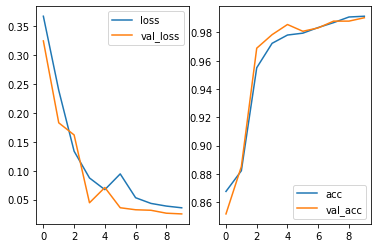

In [340]:
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()

plt.subplot(1, 2, 2)

plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()
     


In [341]:
# function to predict messages based on model
# (should return list containing prediction and label, ex. [0.008318834938108921, 'ham'])
def predict_message(pred_text):
  prediction = model.predict([pred_text,])[0][0]
  

  print(pred_text, prediction)
  return ( prediction,  'spam' if prediction>0.5 else 'ham')

pred_text = "how are you doing today?"

prediction = predict_message(pred_text)
print(prediction)

1/1 [==============================] - 2s 2s/step
how are you doing today? -0.09645524
(-0.09645524, 'ham')


In [342]:
# Run this cell to test your function and model. Do not modify contents.
def test_predictions():
  test_messages = ["how are you doing today",
                   "sale today! to stop texts call 98912460324",
                   "i dont want to go. can we try it a different day? available sat",
                   "our new mobile video service is live. just install on your phone to start watching.",
                   "you have won £1000 cash! call to claim your prize.",
                   "i'll bring it tomorrow. don't forget the milk.",
                   "wow, is your arm alright. that happened to me one time too"
                  ]

  test_answers = ["ham", "spam", "ham", "spam", "spam", "ham", "ham"]
  passed = True

  for msg, ans in zip(test_messages, test_answers):
    prediction = predict_message(msg)
    if prediction[1] != ans:
      passed = False

  if passed:
    print("You passed the challenge. Great job!")
  else:
    print("You haven't passed yet. Keep trying.")

test_predictions()


1/1 [==============================] - 0s 37ms/step
how are you doing today -0.09645524
1/1 [==============================] - 0s 36ms/step
sale today! to stop texts call 98912460324 0.54826015
1/1 [==============================] - 0s 30ms/step
i dont want to go. can we try it a different day? available sat -0.16705388
1/1 [==============================] - 0s 27ms/step
our new mobile video service is live. just install on your phone to start watching. 1.0310841
1/1 [==============================] - 0s 31ms/step
you have won £1000 cash! call to claim your prize. 1.1134833
1/1 [==============================] - 0s 27ms/step
i'll bring it tomorrow. don't forget the milk. -0.12911475
1/1 [==============================] - 0s 42ms/step
wow, is your arm alright. that happened to me one time too -0.15782823
You passed the challenge. Great job!
